In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
url='https://raw.githubusercontent.com/FazlyRabbiBD/AcademicWorkspace/master/cpePart3.csv'
df = pd.read_csv(url)
df.head()

,District,HeadOfTheHousehold,Age,Gender,MemberOfHousehold,EducationLevel,Occupation,AnnualIncome
0,Bagerhat,Husband,30.0,Female,5.0,School Secondary Certificate,Housewife,240000.0
1,Bagerhat,Husband,32.0,Female,4.0,Primary,Housewife,75000.0
2,Bagerhat,Husband,40.0,Female,5.0,Literate,Housewife,95000.0
3,Bagerhat,Self,28.0,Male,3.0,Primary,Fishermen,180000.0
4,Bagerhat,Husband,58.0,Female,5.0,Primary,Housewife,75000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   District            492 non-null    object 
 1   HeadOfTheHousehold  492 non-null    object 
 2   Age                 489 non-null    float64
 3   Gender              484 non-null    object 
 4   MemberOfHousehold   489 non-null    float64
 5   EducationLevel      492 non-null    object 
 6   Occupation          485 non-null    object 
 7   AnnualIncome        491 non-null    float64
dtypes: float64(3), object(5)
memory usage: 30.9+ KB


In [ ]:
df.describe()

,Age,MemberOfHousehold,AnnualIncome
count,489.000000,489.000000,491.000000
mean,41.380368,4.965235,91537.417515
std,13.991307,3.708765,73312.686929
min,4.000000,1.000000,72.000000
25%,30.000000,4.000000,48000.000000
50%,40.000000,5.000000,72000.000000
75%,50.000000,6.000000,120000.000000
max,85.000000,62.000000,600000.000000


In [ ]:
df.median()

Age                     40.0
MemberOfHousehold        5.0
AnnualIncome         72000.0
dtype: float64

In [3]:
df.mode()

,District,HeadOfTheHousehold,Age,Gender,MemberOfHousehold,EducationLevel,Occupation,AnnualIncome
0,Patuakhali,Self,45.0,Female,5.0,Primary,Housewife,120000.0


In [ ]:
df.kurtosis()

Age                   -0.095558
MemberOfHousehold    162.430480
AnnualIncome          10.761812
dtype: float64

Income Analysis

In [ ]:
df.AnnualIncome.mean()

91537.41751527495

In [ ]:
df.AnnualIncome.std()

73312.68692930794

In [ ]:
df.AnnualIncome.median()

72000.0

In [5]:
pd.pivot_table(df, index=['Gender'], values=['AnnualIncome'], aggfunc=['median'])

,median
,AnnualIncome
Gender,
Female,60000.0
Male,92000.0


In [6]:
pd.pivot_table(df, index=['Gender','District'], values=['AnnualIncome'], aggfunc=['median','mean','std'])

median           mean           std
                  AnnualIncome   AnnualIncome  AnnualIncome
Gender District                                            
Female Bagerhat        84000.0  100774.293333  59170.235444
       Khulna          67500.0   97900.000000  86590.933380
       Patuakhali      48000.0   61516.546763  60890.692748
Male   Bagerhat       120000.0  144416.666667  68923.266512
       Khulna          84000.0  111119.047619  90980.084227
       Patuakhali      72000.0   88842.519685  69528.163210

In [9]:
pd.pivot_table(df, index=['Occupation'], values=['AnnualIncome'], aggfunc='median')

,AnnualIncome
Occupation,
Business,94000.0
Day labor,48000.0
Driving,50000.0
Famers,100000.0
Fish culture,85000.0
Fishermen,72000.0
Government job,350000.0
Handicrrafts,72000.0
Housewife,72000.0


In [10]:
df.groupby('Gender')['Age'].mean()

Gender
Female    38.055118
Male      44.960526
Name: Age, dtype: float64

Occupation Analysis

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [ ]:
x=df.groupby('Occupation')['District'].count().sort_values()
x

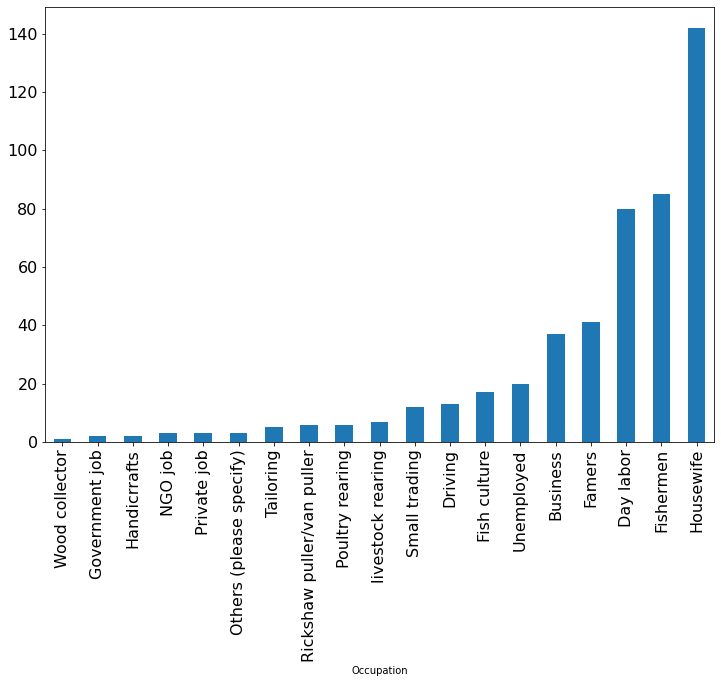

In [ ]:
x.plot(kind='bar',figsize=(12,8),fontsize=16)
plt.show()

In [ ]:
pd.crosstab(df.Gender, df.Age, values=df.MemberOfHousehold, aggfunc='mean').round(0)

Age,4.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,68.0,70.0,73.0,75.0,78.0,80.0,81.0,83.0,84.0,85.0
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,4.0,4.0,4.0,5.0,4.0,5.0,NaN,4.0,6.0,5.0,4.0,4.0,7.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,12.0,4.0,NaN,4.0,6.0,3.0,3.0,NaN,5.0,4.0,5.0,3.0,NaN,4.0,4.0,NaN,5.0,6.0,3.0,NaN,5.0,NaN,NaN,4.0,NaN,2.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
Male,NaN,NaN,NaN,5.0,6.0,4.0,6.0,6.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,NaN,5.0,6.0,NaN,5.0,4.0,4.0,12.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,6.0,4.0,5.0,7.0,3.0,6.0,6.0,5.0,6.0,6.0,5.0,NaN,6.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,5.0,2.0,2.0,3.0,3.0,3.0,NaN,7.0,2.0


In [14]:
pd.crosstab(df['District'],df['Gender'])

Gender,Female,Male
District,,
Bagerhat,75,60
Khulna,40,42
Patuakhali,139,128


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


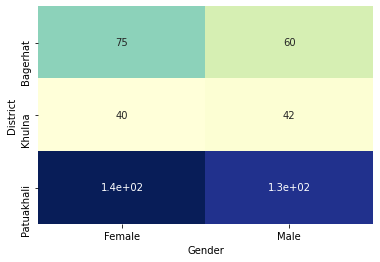

In [17]:
sns.heatmap(pd.crosstab(index=df['District'],
                    columns=df['Gender']),
            cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
pd.crosstab(index=df['District'],
                    columns=df['Gender'],
                    normalize='all')

Gender,Female,Male
District,,
Bagerhat,75,60
Khulna,40,42
Patuakhali,139,128


District wise Gender

In [18]:
pd.crosstab(df['District'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)*100

Gender,Female,Male
District,,
Bagerhat,55.555556,44.444444
Khulna,48.780488,51.219512
Patuakhali,52.059925,47.940075


Occupation wise Gender

In [19]:
pd.crosstab(df['Occupation'],df['Gender'],normalize='all')

Gender,Female,Male
Occupation,,
Business,0.018868,0.058700
Day labor,0.096436,0.064990
Driving,0.006289,0.020964
Famers,0.008386,0.075472
Fish culture,0.010482,0.025157
Fishermen,0.035639,0.140461
Government job,0.002096,0.002096
Handicrrafts,0.000000,0.004193
Housewife,0.291405,0.002096


In [20]:
pd.options.display.float_format = "{:,.2f}".format
pd.crosstab(index=df['Occupation'],
                    columns=df['Gender'],
                    normalize='all')

Gender,Female,Male
Occupation,,
Business,0.02,0.06
Day labor,0.10,0.06
Driving,0.01,0.02
Famers,0.01,0.08
Fish culture,0.01,0.03
Fishermen,0.04,0.14
Government job,0.00,0.00
Handicrrafts,0.00,0.00
Housewife,0.29,0.00


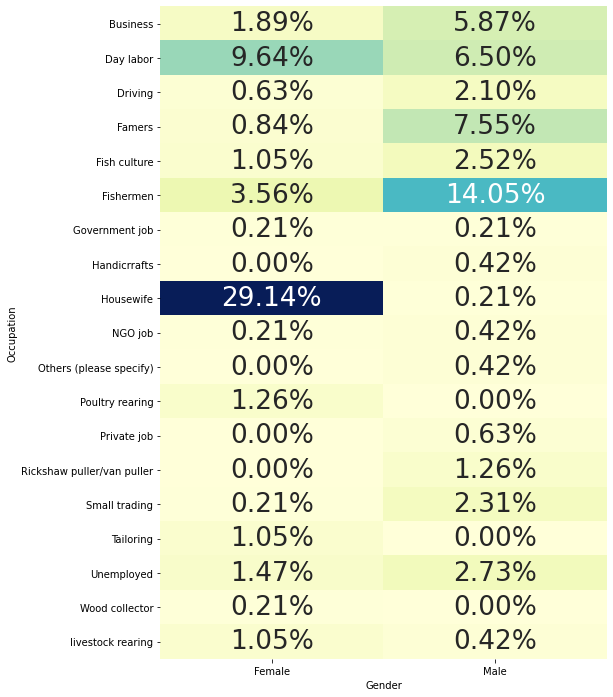

In [21]:
plt.subplots(figsize=(8,12))
sns.set(font_scale=2.2)
sns.heatmap(pd.crosstab(index=df['Occupation'],
                    columns=df['Gender'],
                    normalize='all'),
            cmap="YlGnBu", annot=True, cbar=False,fmt=".2%")
            

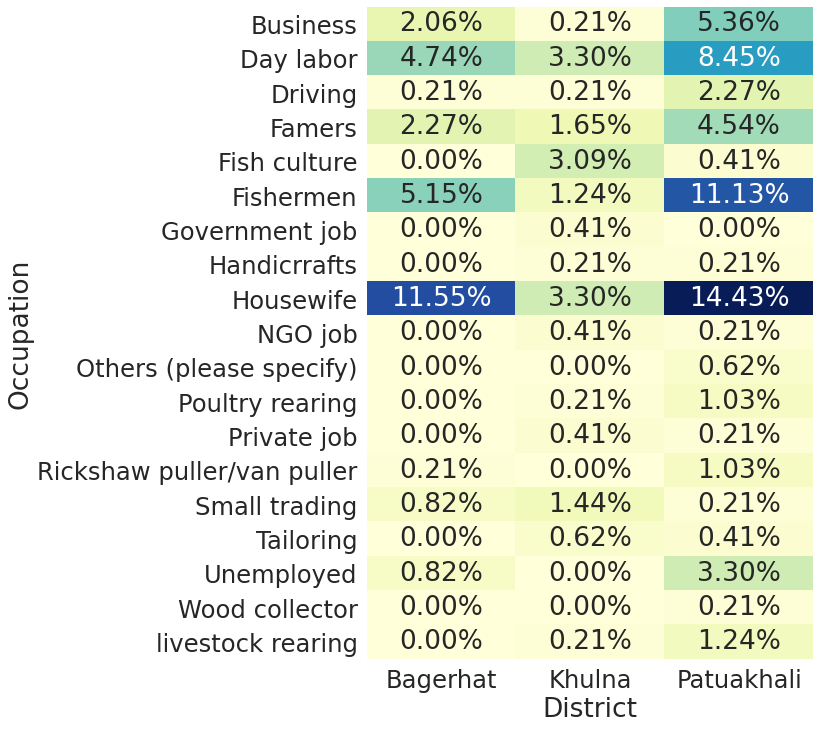

In [ ]:
plt.subplots(figsize=(8,12))
sns.set(font_scale=2.2)
sns.heatmap(pd.crosstab(index=df['Occupation'],
                    columns=df['District'],
                    normalize='all'),
            cmap="YlGnBu", annot=True, cbar=False,fmt=".2%")

Household

In [ ]:
df.MemberOfHousehold.mean()

4.965235173824131

In [ ]:
df.MemberOfHousehold.std()

3.7087648174586856

In [ ]:
df.MemberOfHousehold.median()

5.0

In [ ]:
pd.pivot_table(df, index=['District'], values=['MemberOfHousehold'], aggfunc='mean')

,MemberOfHousehold
District,
Bagerhat,1.92
Khulna,8.22
Patuakhali,1.56


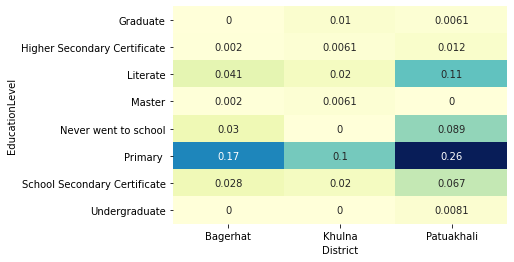

In [ ]:
sns.heatmap(pd.crosstab(index=df['EducationLevel'],
                    columns=df['District'],
                    normalize='all'),
            cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
pd.crosstab(df['EducationLevel'],df['Gender'])

Gender,Female,Male
EducationLevel,,
Graduate,4,4
Higher Secondary Certificate,3,7
Literate,46,40
Master,1,3
Never went to school,25,31
Primary,149,112
School Secondary Certificate,26,29
Undergraduate,0,4


In [ ]:
pd.pivot_table(df, index=['Gender', 'District'], values=['AnnualIncome','MemberOfHousehold','Age'], aggfunc='mean')

Age   AnnualIncome  MemberOfHousehold
Gender District                                               
Female Bagerhat    40.600000   99815.253333           4.746667
       Khulna      37.275000   97900.000000           5.500000
       Patuakhali  36.906475   61516.546763           4.500000
Male   Bagerhat    46.250000  170666.666667           5.050000
       Khulna      46.833333  111119.047619           6.285714
       Patuakhali  43.722222   88842.519685           4.888889

In [ ]:
pd.pivot_table(df, index=['Gender', 'District'], values=['AnnualIncome','MemberOfHousehold','Age'], aggfunc='std')

Age   AnnualIncome  MemberOfHousehold
Gender District                                               
Female Bagerhat    12.797804   60216.574278           2.105933
       Khulna      10.959102   86590.933380           7.548136
       Patuakhali  11.724428   60890.692748           1.539030
Male   Bagerhat    16.055650  218465.113118           1.651142
       Khulna      13.122159   90980.084227           8.887606
       Patuakhali  15.439502   69528.163210           1.503182

In [ ]:
pd.pivot_table(df, index=['Gender'], values=['AnnualIncome','MemberOfHousehold','Age'], aggfunc='mean')

,Age,AnnualIncome,MemberOfHousehold
Gender,,,
Female,38.055118,78554.897638,4.731225
Male,44.960526,114366.812227,5.188596


In [ ]:
pd.pivot_table(df, index=['Gender'], values=['AnnualIncome','MemberOfHousehold','Age'], aggfunc='std')

,Age,AnnualIncome,MemberOfHousehold
Gender,,,
Female,12.005800,67760.026952,3.395681
Male,15.208774,133076.504638,4.061689


In [ ]:
pd.pivot_table(df, index=['District'], values=['AnnualIncome','MemberOfHousehold','Age'], aggfunc='mean')

,Age,AnnualIncome,MemberOfHousehold
District,,,
Bagerhat,43.111111,131304.770370,4.881481
Khulna,42.170732,104670.731707,5.902439
Patuakhali,40.283088,73499.270073,4.724265


In [ ]:
pd.pivot_table(df, index=['Occupation'], values=['AnnualIncome'], aggfunc='mean')

,AnnualIncome
Occupation,
Business,112529.777778
Day labor,78947.500000
Driving,65538.461538
Famers,114707.317073
Fish culture,93000.000000
Fishermen,89035.294118
Government job,350000.000000
Handicrrafts,72000.000000
Housewife,90549.802817


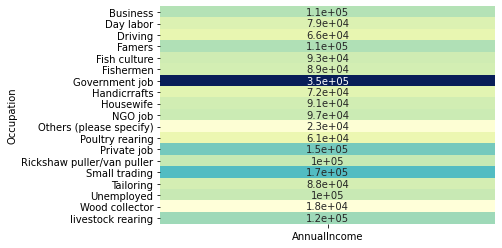

In [ ]:
sns.heatmap(pd.pivot_table(df, index=['Occupation'], values=['AnnualIncome'], aggfunc='mean'),
            cmap="YlGnBu", annot=True, cbar=False)

In [ ]:
pd.pivot_table(df, index=['EducationLevel'], values=['AnnualIncome'], aggfunc='mean')

,AnnualIncome
EducationLevel,
Graduate,175000.000000
Higher Secondary Certificate,119700.000000
Literate,73256.651163
Master,225000.000000
Never went to school,71542.372881
Primary,100968.939394
School Secondary Certificate,95429.857143
Undergraduate,107500.000000


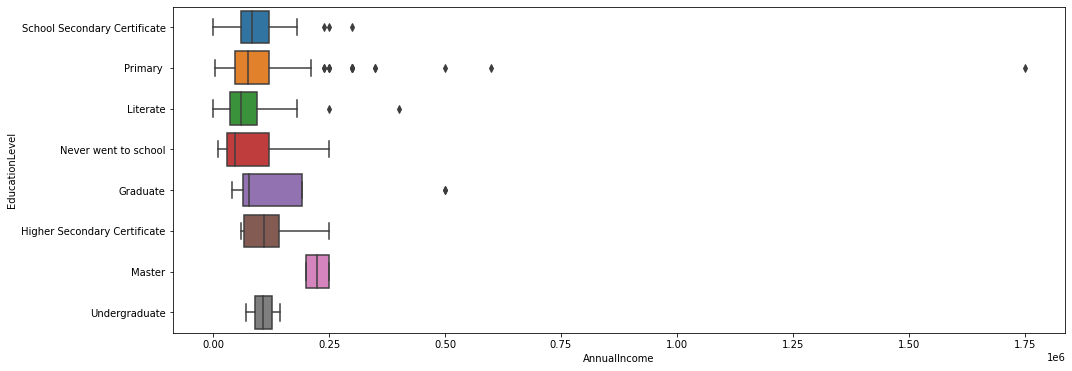

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="AnnualIncome", y="EducationLevel", data=df)

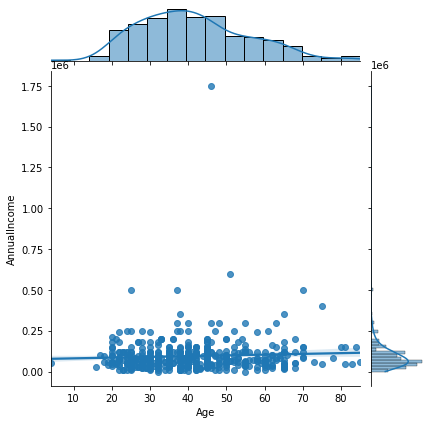

In [ ]:
sns.jointplot(x="Age", y="AnnualIncome", data=df, kind="reg");

**CPE-Sampl-Demography**

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/AcademicWorkspace/master/CPE-Demography-24.csv', encoding = "ISO-8859-1", engine='python')
df1.head()

,District,Upazila,Union,Village,Name,Gender,Mobile
0,Bagerhat,Sharankhola,Khontakata,Burbo Khantakata,Md Rahim Gazi,Female,1765105505
1,Khulna,Paikgacha,Deluti,Chakri bakri,Priyanka Sarker,Female,1851634271
2,Khulna,Paikgacha,Deluti,Chakri bakri,Kanchan Rani Mandol,Female,1981275661
3,Khulna,Paikgacha,Deluti,Chakri bakri,Laxmi rani sarker,Female,1954909545
4,Khulna,Paikgacha,Deluti,Chakri bakri,Modhushudon mondol,Male,1952966467


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  492 non-null    object
 1   Upazila   492 non-null    object
 2   Union     492 non-null    object
 3   Village   492 non-null    object
 4   Name      492 non-null    object
 5   Gender    492 non-null    object
 6   Mobile    428 non-null    object
dtypes: object(7)
memory usage: 27.0+ KB


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
   df1.groupby(['District', 'Upazila','Union','Village']).count()

Name  Gender  Mobile
District   Upazila     Union      Village                                     
Bagerhat   Sharankhola Baliatali  Uttar Kadamtala            1       1       1
                       Khontakata Burbo Khantakata           1       1       1
                                  Dakhan Khantakata          5       5       5
                                  Dakhshin Khodhom           1       1       1
                                  Dakshin Khantakata         2       2       2
                                  Dakshin Khantakata         1       1       1
                                  East khontakata           11      11      11
                                  Purbo  Khantakata          1       1       1
                                  Purbo Khantakata          10      10      10
                                  South khontakata           9       9       9
                       Rayenda    Chalranda                  1       1       1
                                  Chalrayanda                1       1       1
                                  Chalrayend                 2       2       2
                                  Chalrayenda                5       5       5
                                  Chalraynda                 2       2       2
                                  Jilbunia                   5       5       5
                                  Jilbuniya                  9       9       9
                                  Jillbhuniya                2       2       2
                                  Jillbunia                  1       1       1
                                  Jillbuniya                 7       7       7
                                  Lakurtola                  6       6       6
                                  Rajashor                   3       3       3
                                  Rajasshor                  2       2       1
                                  Uttam Kadomtola            1       1       1
                                  Uttar Kadamtala            6       6       6
                                  Uttar Kadamtola            1       1       1
                                  Uttar Kademtala            1       1       1
                                  Uttar Kadomtola            3       3       3
                                  Uttar Kadomtoli            2       2       2
                                  Uttor khodhom tola        10      10       9
Khulna     Paikgacha   Deluti     Chakri  bakri              1       1       1
                                  Chakri bakri               3       3       3
                                  Chakribakri                4       4       4
                                  Chokribokri                1       1       1
                                  Delute\n                   1       1       1
                                  Deluti                    16      16      16
                                  Geuabunia                  8       8       8
                                  Geubunia                   5       5       5
                                  Harinkhola                 9       9       8
                                  Harinkhola                 1       1       1
                                  Jirbunia                  15      15      15
                                  Madhukhali                 1       1       1
                                  Madhukhalià                1       1       1
                                  Parmadhukhali              5       5       5
                                  Per madhukhali             6       6       6
                                  Radha nagor                2       2       2
                                  Radhanagar                 2       2       2
                       Soladana   Harinkhola                 1       1       1
Patuakhali Kalapara    Latachapli East kajura                1       1       1
                             

In [ ]:
pd.crosstab(df1.District, df1.Upazila,  margins=True, margins_name="Total")

Upazila,Kalapara,Paikgacha,Sharankhola,Total
District,,,,
Bagerhat,0,0,135,135
Khulna,0,82,0,82
Patuakhali,275,0,0,275
Total,275,82,135,492


In [ ]:
pd.pivot_table(df1, index=['District','Upazila','Union','Village'], values=['Name'], columns=df1['Gender'], 
               aggfunc=lambda x:x.count()/df1['Name'].count()*100,
               fill_value=0,margins_name='All')

Name          
Gender                                                     Female      Male
District   Upazila     Union      Village                                  
Bagerhat   Sharankhola Khontakata Burbo Khantakata       0.203252  0.000000
                                  Dakhshin Khodhom       1.422764  0.406504
                                  Purbo  Khantakata      2.439024  2.032520
                                  South khontakata       0.813008  1.016260
                       Rayenda    Chalrayanda            1.422764  0.813008
                                  Jilbuniya              2.032520  2.845528
                                  Lakurtola              0.609756  0.609756
                                  Rajashor               0.609756  0.406504
                                  Sharankhala Charkanda  1.016260  0.609756
                                  Sharankhola            1.626016  1.422764
                                  Uttar Kadamtala        3.048780  2.032520
Khulna     Paikgacha   Deluti     Chakri bakri           0.609756  1.219512
                                  Deluti                 1.422764  2.032520
                                  Geuabunia              1.422764  1.219512
                                  Harinkhola             1.016260  1.016260
                                  Jirbunia               1.829268  1.219512
                                  Madhukhali             0.000000  0.406504
                                  Parmadhukhali          1.016260  1.219512
                                  Radhanagar             0.813008  0.000000
                       Soladana   Harinkhola             0.000000  0.203252
Patuakhali Kalapara    Latachapli East kajura            0.406504  0.000000
                                  Fashi para             1.016260  0.406504
                                  Khajura para           0.406504  0.406504
                                  Koliapara              0.406504  0.406504
                                  Middel khajura         3.861789  4.268293
                                  Moddho mosulliyabad    1.422764  0.406504
                                  Mosiliabadh            3.861789  3.252033
                                  Nauripara              0.609756  0.813008
                                  West kazura (abashon)  2.235772  1.422764
                                  West khajura gurakhal  1.016260  1.016260
                       Mahipur    Kamulpur               2.439024  1.829268
                                  Komorpur               2.235772  2.439024
                                  Nazimpur               4.268293  4.878049
                                  Shodirpur              4.471545  5.691057

In [ ]:
df1.Village.unique()

array(['Burbo Khantakata', 'Chakri bakri', 'Chalrayanda',
       'Dakhshin Khodhom', 'Deluti', 'East kajura', 'Fashi para',
       'Geuabunia', 'Harinkhola', 'Jilbuniya', 'Jirbunia', 'Kamulpur',
       'Khajura para', 'Koliapara', 'Komorpur', 'Lakurtola', 'Madhukhali',
       'Middel khajura', 'Mosiliabadh', 'Moddho mosulliyabad',
       'Nauripara', 'Nazimpur', 'Parmadhukhali', 'Purbo  Khantakata',
       'Radhanagar', 'Rajashor', 'Sharankhala Charkanda', 'Sharankhola',
       'Shodirpur', 'South khontakata', 'Uttar Kadamtala',
       'West kazura (abashon)', 'West khajura gurakhal'], dtype=object)

In [ ]:
pd.pivot_table(df1, index=['District','Upazila','Union','Village'], values=['Name'], columns=df1['Gender'], aggfunc=['count'],
               fill_value=0,margins_name='All')

count     
                                                          Name     
Gender                                                  Female Male
District   Upazila     Union      Village                          
Bagerhat   Sharankhola Khontakata Burbo Khantakata           1    0
                                  Dakhshin Khodhom           7    2
                                  Purbo  Khantakata         12   10
                                  South khontakata           4    5
                       Rayenda    Chalrayanda                7    4
                                  Jilbuniya                 10   14
                                  Lakurtola                  3    3
                                  Rajashor                   3    2
                                  Sharankhala Charkanda      5    3
                                  Sharankhola                8    7
                                  Uttar Kadamtala           15   10
Khulna     Paikgacha   Deluti     Chakri bakri               3    6
                                  Deluti                     7   10
                                  Geuabunia                  7    6
                                  Harinkhola                 5    5
                                  Jirbunia                   9    6
                                  Madhukhali                 0    2
                                  Parmadhukhali              5    6
                                  Radhanagar                 4    0
                       Soladana   Harinkhola                 0    1
Patuakhali Kalapara    Latachapli East kajura                2    0
                                  Fashi para                 5    2
                                  Khajura para               2    2
                                  Koliapara                  2    2
                                  Middel khajura            19   21
                                  Moddho mosulliyabad        7    2
                                  Mosiliabadh               19   16
                                  Nauripara                  3    4
                                  West kazura (abashon)     11    7
                                  West khajura gurakhal      5    5
                       Mahipur    Kamulpur                  12    9
                                  Komorpur                  11   12
                                  Nazimpur                  21   24
                                  Shodirpur                 22   28